In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('colorblind')
cards = pd.read_csv('data/dataset-cards.csv', sep = ';')
cards.drop_duplicates(subset ="card_number",keep = False, inplace = True)

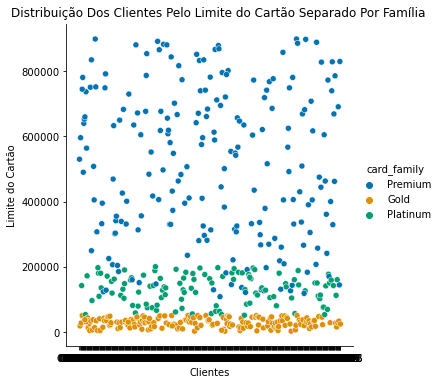

In [2]:
distribuicao_credit_limit = sns.relplot(x='customer_id', y='credit_limit', hue='card_family', data=cards)
fig = distribuicao_credit_limit.fig
fig.suptitle('Distribuição Dos Clientes Pelo Limite do Cartão Separado Por Família', y= 1.02)
distribuicao_credit_limit.set(xlabel= 'Clientes', ylabel= 'Limite do Cartão')

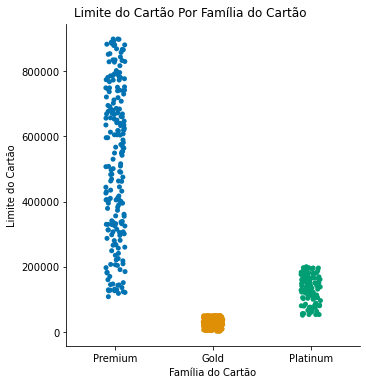

In [5]:
credit_by_family = sns.catplot(x="card_family", y="credit_limit", hue="card_family", data=cards)
fig = credit_by_family.fig
fig.suptitle('Limite do Cartão Por Família do Cartão',y=1.02)
credit_by_family.set(xlabel='Família do Cartão', ylabel= 'Limite do Cartão')

In [16]:
group_card_family = cards.groupby('card_family')

In [17]:
group_card_family['credit_limit'].describe()

,count,mean,std,min,25%,50%,75%,max
card_family,,,,,,,,
Gold,181.0,27878.453039,13495.127921,2000.0,17000.0,28000.0,38000.0,50000.0
Platinum,112.0,131294.642857,43272.369811,51000.0,101500.0,136500.0,166250.0,200000.0
Premium,207.0,514763.285024,232013.740397,108000.0,325000.0,516000.0,710000.0,899000.0


Text(0, 0.5, 'Limite do Cartão')

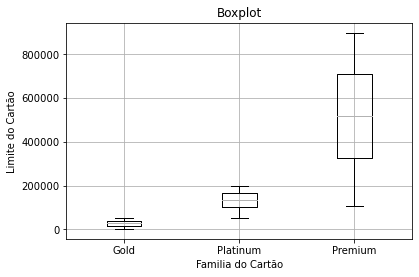

In [18]:
boxplot = cards.boxplot(['credit_limit'], by = ['card_family'])
boxplot.set_title('Boxplot')
fig = boxplot.get_figure()
fig.suptitle('')
boxplot.set_xlabel('Familia do Cartão')
boxplot.set_ylabel('Limite do Cartão')

- **Conclusão:** Através dos gráficos foi possível vizualizar que os cartões de família "Gold" e "Platinum" possuem uma faixa de limite bem definida. Separando o *dataset* em grupos pela "card_family" e observando seus dados estatísticos foi possível determinar que o limite para a família "Gold" = [ 2.000 ; 50.000 ] e "Platinum" = [ 51.000 ; 200.000 ]. Para o "Premium" não foi possível determinar um intervalo especifico, uma vez que não foram encontrados outliers dentro do boxplot e o limite minimo é de 108.000 que estaria dentro do intervalo Platinum, o que permite concluir que para o ranqueamento Premium não é só considerado o card_limit. Outra conclusão que pode ser obtida é que se o card_limit for superior a 200.000 a card_family será definida como Premium.